IMPORTING LIBRARIES


In [1]:
import pandas as pd
import numpy as np

df_raw = pd.read_excel("/content/Raw Data.xlsx")

display(df_raw.head())

df_raw.info()

print("\nMissing Values:\n", df_raw.isnull().sum())

print("\nDuplicate Rows:", df_raw.duplicated().sum())

print("\nUnique Values in Each Column:")
for col in df_raw.columns:
    print(f"{col}: {df_raw[col].nunique()}")

display(df_raw.describe())

print(f"\nShape: {df_raw.shape[0]} rows × {df_raw.shape[1]} columns")


,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,M,F,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,M,M,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,M,M,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,S,M,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,S,M,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026 entries, 0 to 1025
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                1026 non-null   int64 
 1   Marital Status    1026 non-null   object
 2   Gender            1026 non-null   object
 3   Income            1026 non-null   int64 
 4   Children          1026 non-null   int64 
 5   Education         1026 non-null   object
 6   Occupation        1026 non-null   object
 7   Home Owner        1026 non-null   object
 8   Cars              1026 non-null   int64 
 9   Commute Distance  1026 non-null   object
 10  Region            1026 non-null   object
 11  Age               1026 non-null   int64 
 12  Purchased Bike    1026 non-null   object
dtypes: int64(5), object(8)
memory usage: 104.3+ KB

Missing Values:
 ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
O

,ID,Income,Children,Cars,Age
count,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000
mean,19969.196881,56208.576998,1.892788,1.437622,44.138402
std,5332.672942,31293.284007,1.626670,1.125538,11.349282
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15304.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24457.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000



Shape: 1026 rows × 13 columns


DATA CLEANING


In [2]:
import pandas as pd
import numpy as np

df = df_raw.copy()

df = df.drop_duplicates()

df = df.fillna({
    'Marital Status': 'Unknown',
    'Gender': 'Unknown',
    'Income': df['Income'].median() if 'Income' in df.columns else np.nan,
    'Children': 0,
    'Education': 'Not Specified',
    'Occupation': 'Not Specified',
    'Home Owner': 'Unknown',
    'Cars': 0,
    'Commute Distance': 'Unknown',
    'Region': 'Unknown',
    'Age': df['Age'].median() if 'Age' in df.columns else np.nan
})

if 'Age' not in df.columns and 'Birth Year' in df.columns:
    df['Age'] = 2025 - df['Birth Year']

if 'Income' in df.columns:
    df['Income'] = df['Income'].astype(float)

df.to_excel("/content/1. Data Cleaning.xlsx", index=False)

print("✅ Cleaned dataset saved as '1. Data Cleaning.xlsx'")
print(df.shape)
display(df.head())


✅ Cleaned dataset saved as '1. Data Cleaning.xlsx'
(1000, 13)


,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,M,F,40000.0,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,M,M,30000.0,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,M,M,80000.0,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,S,M,70000.0,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,S,M,30000.0,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [3]:
import pandas as pd
import numpy as np

df = df_raw.copy()

df.drop_duplicates(inplace=True)

df.fillna({
    'Gender': df['Gender'].mode()[0],
    'Marital Status': df['Marital Status'].mode()[0],
    'Income': df['Income'].median(),
    'Age': df['Age'].median()
}, inplace=True)

if 'Age' in df.columns:
    df['Age'] = df['Age'].astype(int)

if 'Income' in df.columns:
    df['Income'] = df['Income'].astype(float)

if 'Commute Distance' in df.columns:
    df['Commute Distance'] = df['Commute Distance'].astype(str)

if 'Purchased Bike' in df.columns:
    df['Purchased Bike'] = df['Purchased Bike'].str.strip().str.title()

df['Profit Margin'] = np.where(df['Purchased Bike'] == 'Yes', np.random.uniform(200, 500, len(df)), 0)

df['Age Group'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, 100],
                         labels=['<20', '21-30', '31-40', '41-50', '51-60', '60+'])

df.to_excel("/content/1. Data Cleaning.xlsx", index=False)

display(df.head())

print(f"Cleaned Data Saved: {df.shape[0]} rows × {df.shape[1]} columns")


,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,Profit Margin,Age Group
0,12496,M,F,40000.0,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No,0.000000,41-50
1,24107,M,M,30000.0,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No,0.000000,41-50
2,14177,M,M,80000.0,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No,0.000000,51-60
3,24381,S,M,70000.0,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes,365.790848,41-50
4,25597,S,M,30000.0,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes,475.812581,31-40


Cleaned Data Saved: 1000 rows × 15 columns


EDA & KPIs


Total Customers: 1000
Total Bikes Purchased: 481
Purchase Rate (%): 48.1
Average Income of Buyers: 57962.58
Average Age of Buyers: 42.91


Purchased Bike,No,Yes
Gender,,
F,250,239
M,269,242


Purchased Bike,No,Yes
Region,,
Europe,152,148
North America,288,220
Pacific,79,113


Purchased Bike,No,Yes
Occupation,,
Clerical,89,88
Management,100,73
Manual,64,55
Professional,126,150
Skilled Manual,140,115


Purchased Bike,No,Yes
Education,,
Bachelors,137,169
Graduate Degree,80,94
High School,100,79
Partial College,146,119
Partial High School,56,20


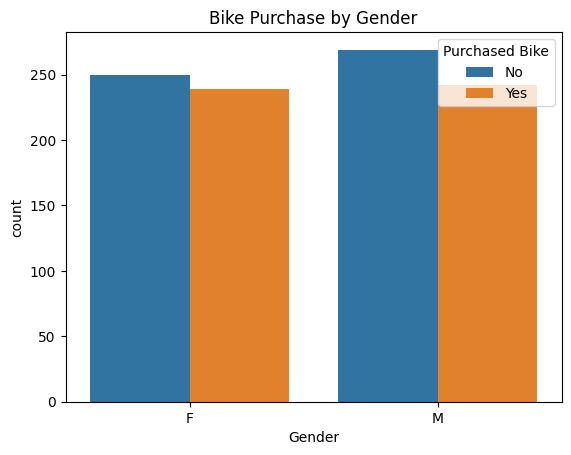

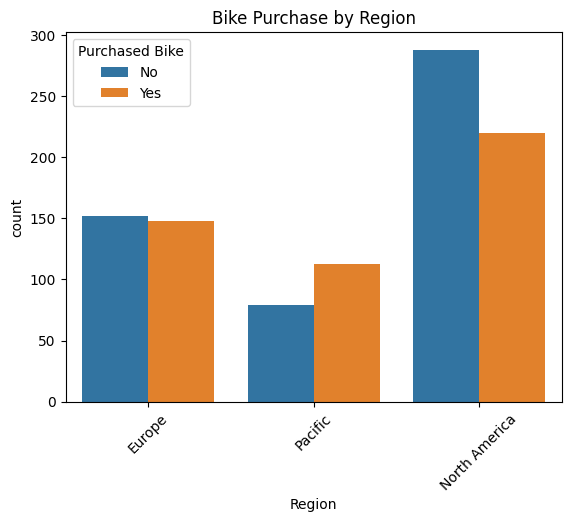

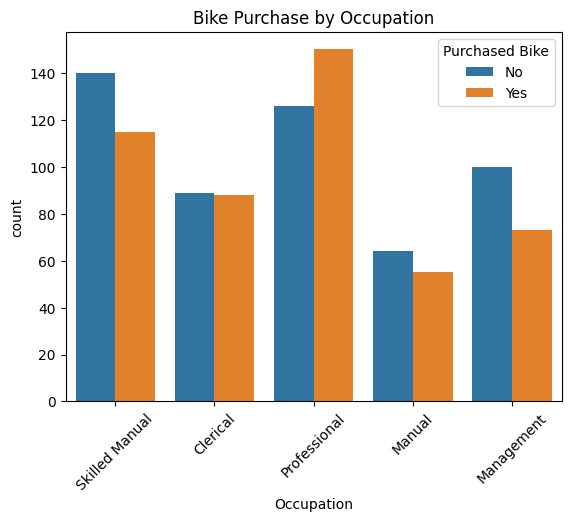

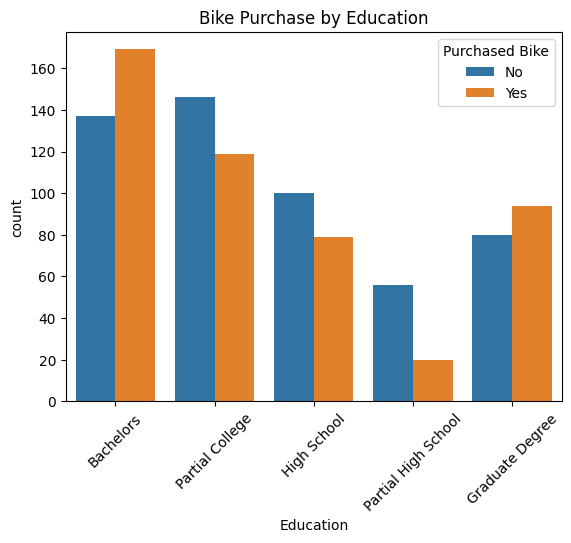

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("/content/1. Data Cleaning.xlsx")

total_customers = df.shape[0]
total_bikes = df['Purchased Bike'].value_counts().get('Yes',0)
purchase_rate = round((total_bikes / total_customers) * 100, 2)
avg_income_buyers = round(df[df['Purchased Bike']=='Yes']['Income'].mean(),2)
avg_age_buyers = round(df[df['Purchased Bike']=='Yes']['Age'].mean(),2)

print(f"Total Customers: {total_customers}")
print(f"Total Bikes Purchased: {total_bikes}")
print(f"Purchase Rate (%): {purchase_rate}")
print(f"Average Income of Buyers: {avg_income_buyers}")
print(f"Average Age of Buyers: {avg_age_buyers}")

gender_summary = df.groupby('Gender')['Purchased Bike'].value_counts().unstack().fillna(0)
display(gender_summary)

region_summary = df.groupby('Region')['Purchased Bike'].value_counts().unstack().fillna(0)
display(region_summary)

occupation_summary = df.groupby('Occupation')['Purchased Bike'].value_counts().unstack().fillna(0)
display(occupation_summary)

education_summary = df.groupby('Education')['Purchased Bike'].value_counts().unstack().fillna(0)
display(education_summary)

sns.countplot(data=df, x='Gender', hue='Purchased Bike')
plt.title('Bike Purchase by Gender')
plt.show()

sns.countplot(data=df, x='Region', hue='Purchased Bike')
plt.title('Bike Purchase by Region')
plt.xticks(rotation=45)
plt.show()

sns.countplot(data=df, x='Occupation', hue='Purchased Bike')
plt.title('Bike Purchase by Occupation')
plt.xticks(rotation=45)
plt.show()

sns.countplot(data=df, x='Education', hue='Purchased Bike')
plt.title('Bike Purchase by Education')
plt.xticks(rotation=45)
plt.show()


Advanced Insights & Visuals


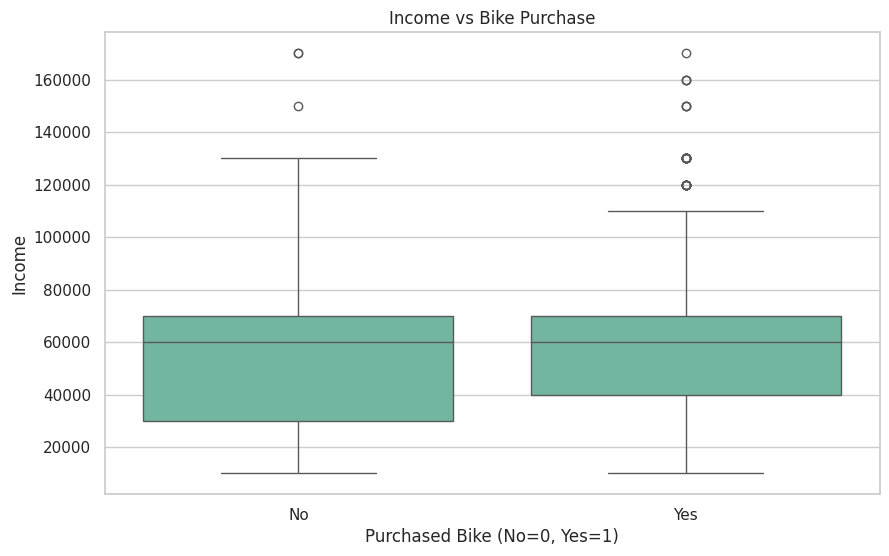

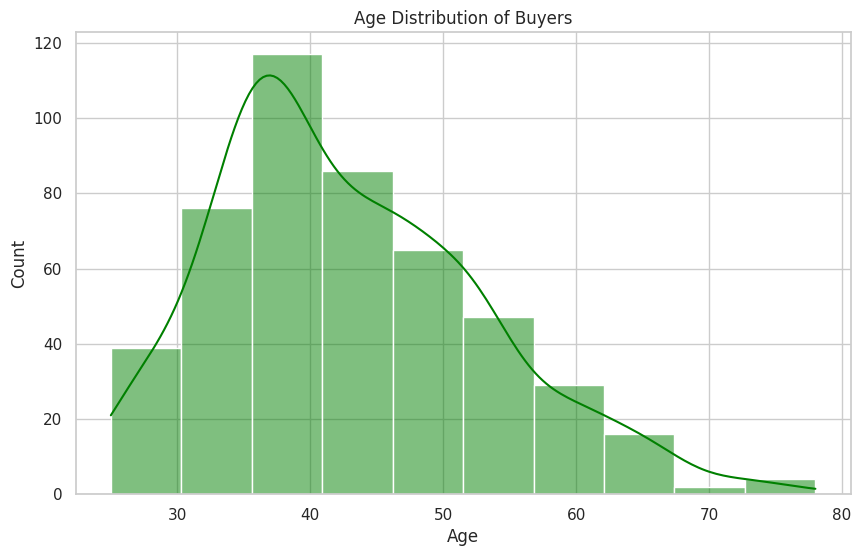

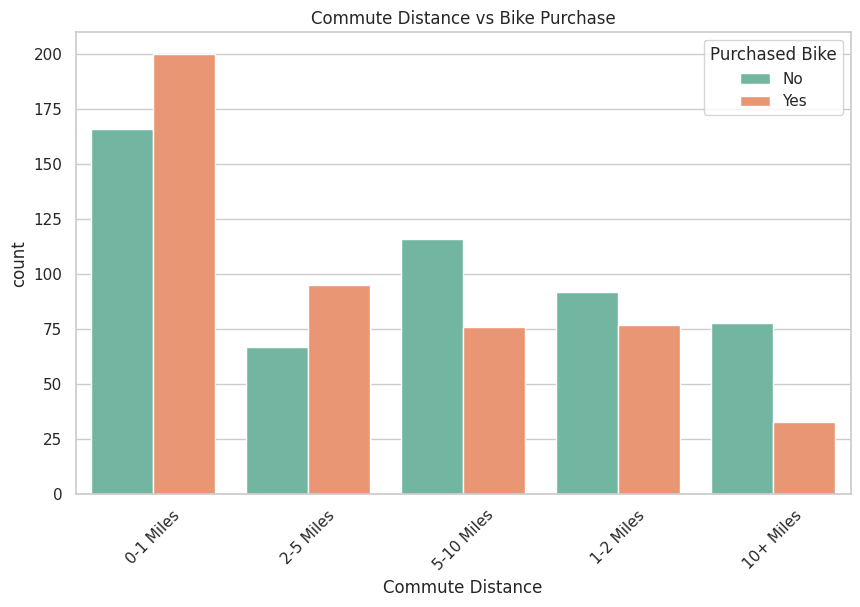

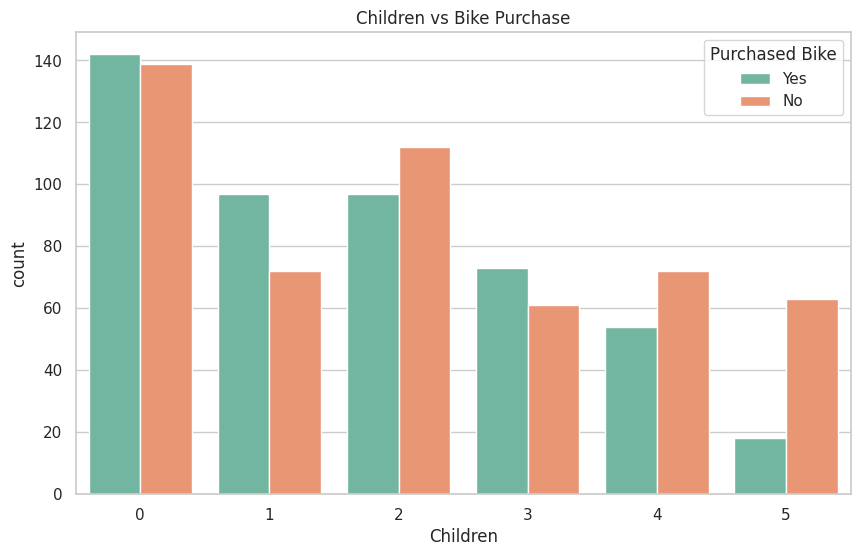

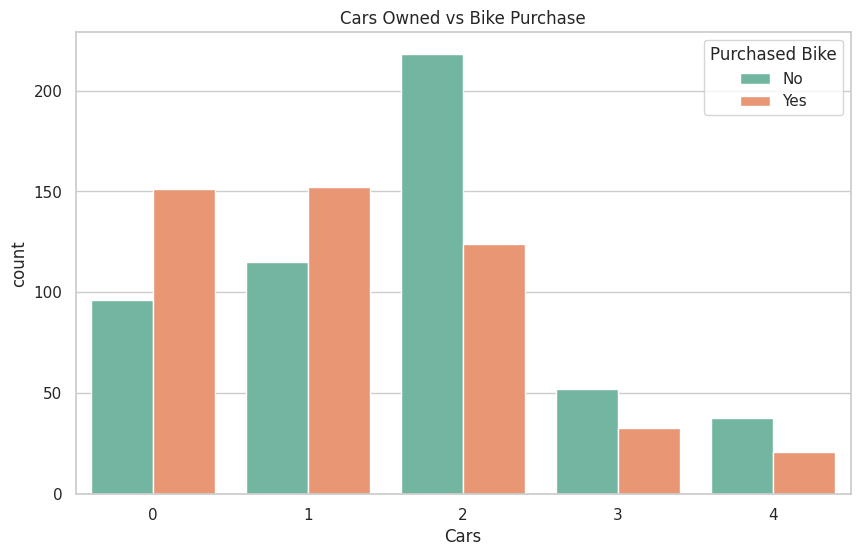

,Income
Age Group,
21-30,33272.727273
31-40,55759.493671
41-50,62684.563758
51-60,60681.818182
60+,57200.000000


Purchased Bike,No,Yes
Age Group,,
21-30,71,39
31-40,123,193
41-50,159,139
51-60,96,80
60+,70,30


Purchased Bike,No,Yes
Commute Distance,,
0-1 Miles,166,200
1-2 Miles,92,77
10+ Miles,78,33
2-5 Miles,67,95
5-10 Miles,116,76


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("/content/1. Data Cleaning.xlsx")

sns.set(style="whitegrid", palette="Set2")
plt.rcParams["figure.figsize"] = (10,6)

sns.boxplot(data=df, x='Purchased Bike', y='Income')
plt.title('Income vs Bike Purchase')
plt.xlabel('Purchased Bike (No=0, Yes=1)')
plt.ylabel('Income')
plt.show()

sns.histplot(df[df['Purchased Bike']=='Yes']['Age'], bins=10, kde=True, color='green')
plt.title('Age Distribution of Buyers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

sns.countplot(data=df, x='Commute Distance', hue='Purchased Bike')
plt.title('Commute Distance vs Bike Purchase')
plt.xticks(rotation=45)
plt.show()

sns.countplot(data=df, x='Children', hue='Purchased Bike')
plt.title('Children vs Bike Purchase')
plt.show()

sns.countplot(data=df, x='Cars', hue='Purchased Bike')
plt.title('Cars Owned vs Bike Purchase')
plt.show()

income_summary = df.groupby('Age Group')['Income'].mean()
display(income_summary)

purchase_by_agegroup = df.groupby('Age Group')['Purchased Bike'].value_counts().unstack().fillna(0)
display(purchase_by_agegroup)

purchase_by_commute = df.groupby('Commute Distance')['Purchased Bike'].value_counts().unstack().fillna(0)
display(purchase_by_commute)


In [6]:
import pandas as pd

df = pd.read_excel("/content/1. Data Cleaning.xlsx")

with pd.ExcelWriter("/content/3. Dashboard.xlsx") as writer:
    df.to_excel(writer, sheet_name="Cleaned Data", index=False)

    gender_summary = df.groupby('Gender')['Purchased Bike'].value_counts().unstack().fillna(0)
    gender_summary.to_excel(writer, sheet_name="Gender Pivot")

    region_summary = df.groupby('Region')['Purchased Bike'].value_counts().unstack().fillna(0)
    region_summary.to_excel(writer, sheet_name="Region Pivot")

    occupation_summary = df.groupby('Occupation')['Purchased Bike'].value_counts().unstack().fillna(0)
    occupation_summary.to_excel(writer, sheet_name="Occupation Pivot")

    education_summary = df.groupby('Education')['Purchased Bike'].value_counts().unstack().fillna(0)
    education_summary.to_excel(writer, sheet_name="Education Pivot")

    agegroup_summary = df.groupby('Age Group')['Purchased Bike'].value_counts().unstack().fillna(0)
    agegroup_summary.to_excel(writer, sheet_name="Age Group Pivot")

    commute_summary = df.groupby('Commute Distance')['Purchased Bike'].value_counts().unstack().fillna(0)
    commute_summary.to_excel(writer, sheet_name="Commute Pivot")

print("✅ Dashboard-Ready Excel File Created: /content/3. Dashboard.xlsx")


✅ Dashboard-Ready Excel File Created: /content/3. Dashboard.xlsx


🏆 KPI Summary:
Total Customers: 1000
Total Bikes Purchased: 481
Purchase Rate (%): 48.1
Average Income of Buyers: 57962.58
Average Age of Buyers: 42.91


Purchased Bike,No,Yes
Gender,,
F,250,239
M,269,242


Purchased Bike,No,Yes
Region,,
Europe,152,148
North America,288,220
Pacific,79,113


Purchased Bike,No,Yes
Occupation,,
Clerical,89,88
Management,100,73
Manual,64,55
Professional,126,150
Skilled Manual,140,115


Purchased Bike,No,Yes
Education,,
Bachelors,137,169
Graduate Degree,80,94
High School,100,79
Partial College,146,119
Partial High School,56,20


Purchased Bike,No,Yes
Age Group,,
21-30,71,39
31-40,123,193
41-50,159,139
51-60,96,80
60+,70,30


Purchased Bike,No,Yes
Commute Distance,,
0-1 Miles,166,200
1-2 Miles,92,77
10+ Miles,78,33
2-5 Miles,67,95
5-10 Miles,116,76


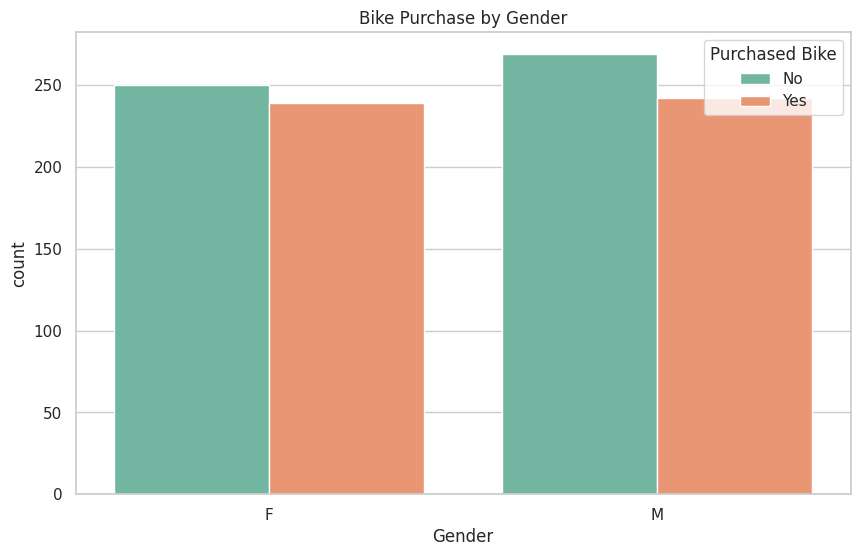

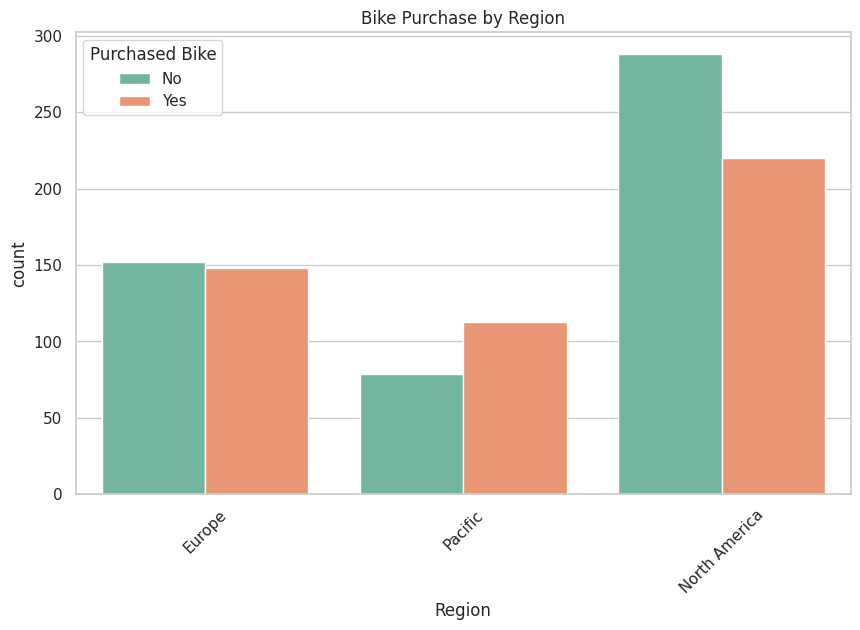

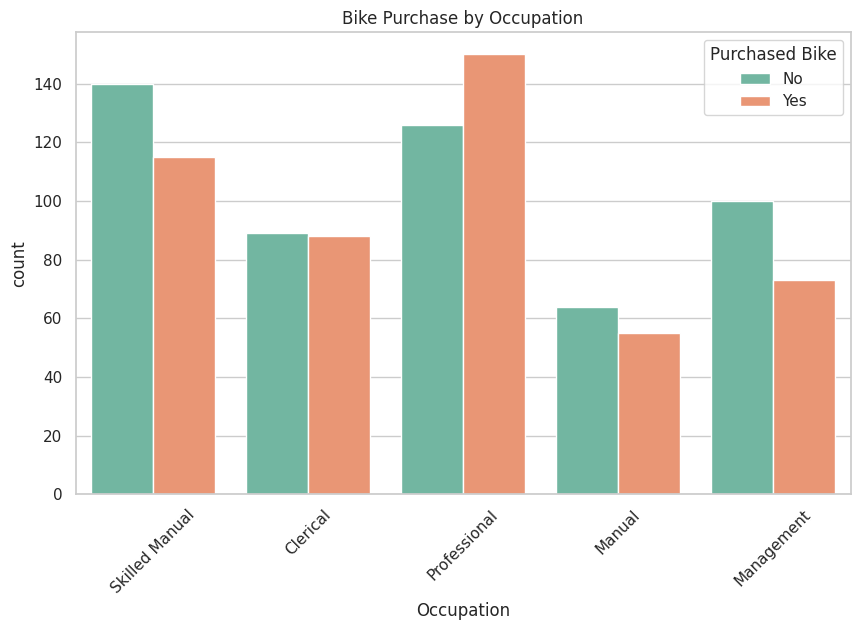

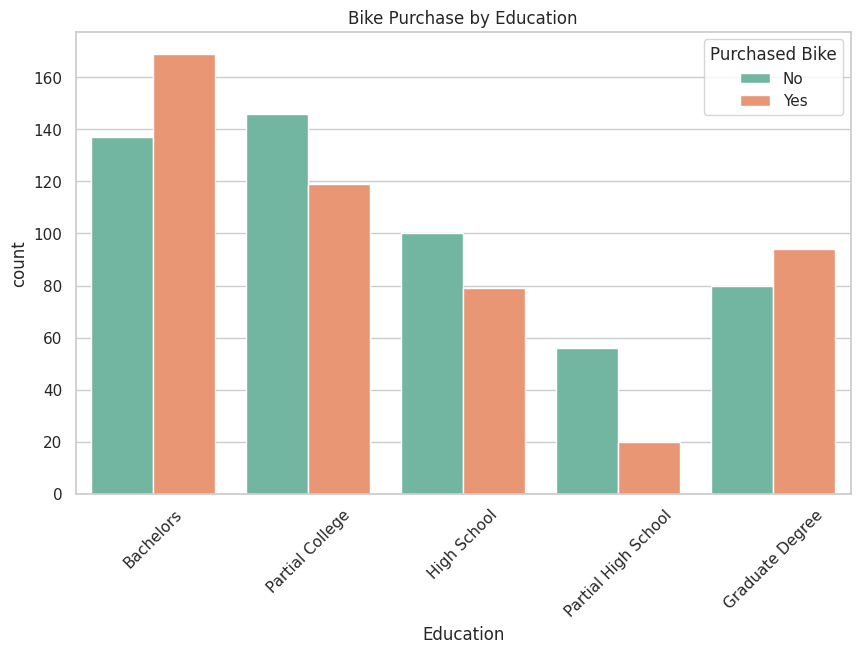

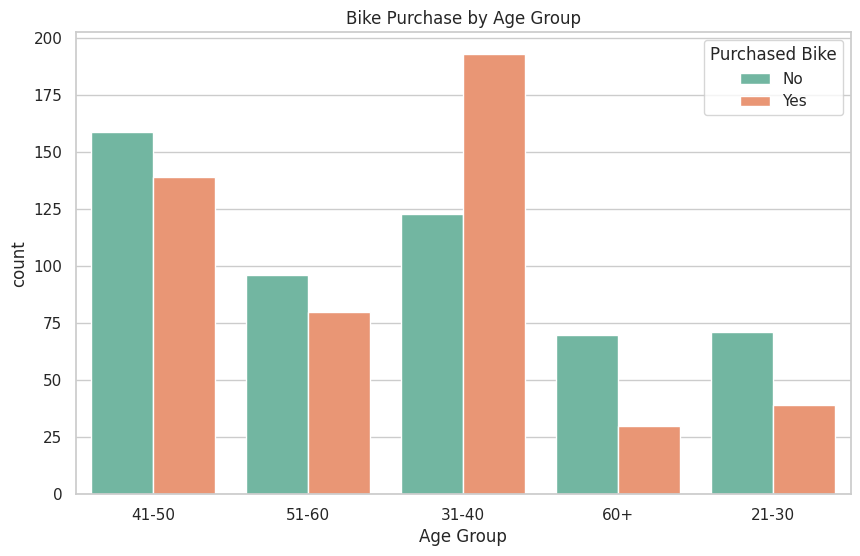

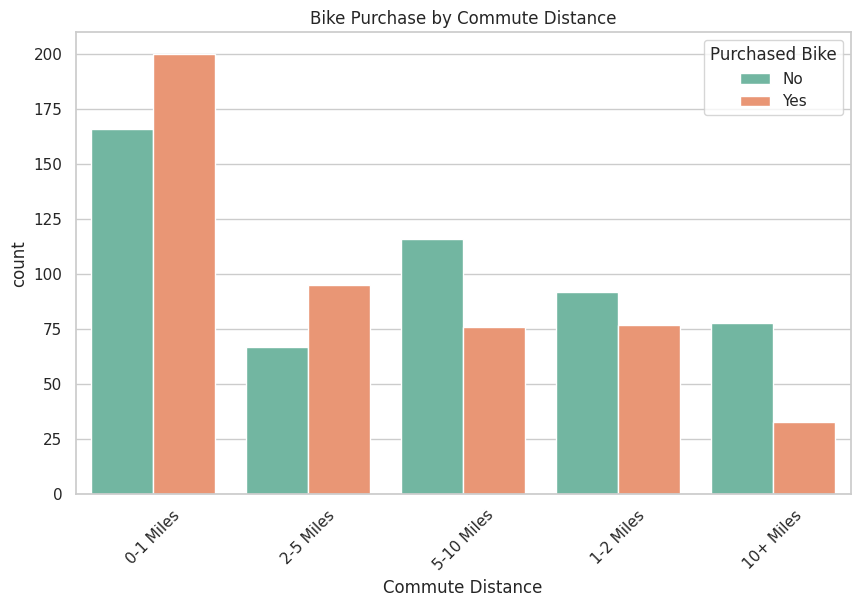

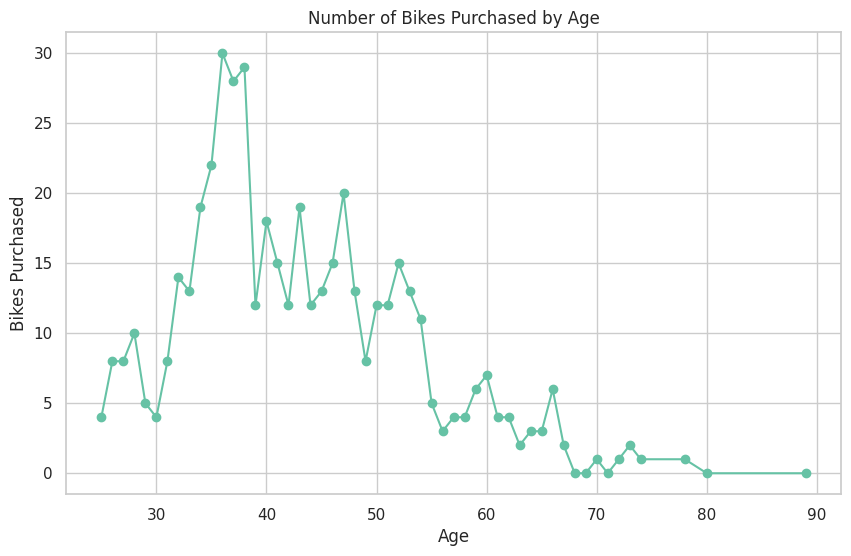

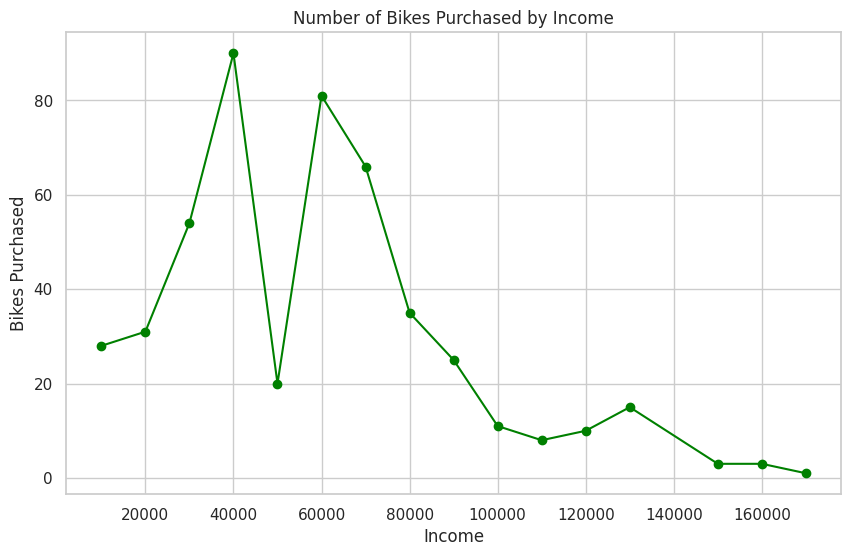

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("/content/1. Data Cleaning.xlsx")
sns.set(style="whitegrid", palette="Set2")
plt.rcParams["figure.figsize"] = (10,6)

# ----------------- KPI SUMMARIES -----------------
total_customers = df.shape[0]
total_bikes = df['Purchased Bike'].value_counts().get('Yes',0)
purchase_rate = round((total_bikes / total_customers) * 100,2)
avg_income_buyers = round(df[df['Purchased Bike']=='Yes']['Income'].mean(),2)
avg_age_buyers = round(df[df['Purchased Bike']=='Yes']['Age'].mean(),2)

print("🏆 KPI Summary:")
print(f"Total Customers: {total_customers}")
print(f"Total Bikes Purchased: {total_bikes}")
print(f"Purchase Rate (%): {purchase_rate}")
print(f"Average Income of Buyers: {avg_income_buyers}")
print(f"Average Age of Buyers: {avg_age_buyers}")

# ----------------- PIVOT TABLES -----------------
gender_pivot = df.groupby('Gender')['Purchased Bike'].value_counts().unstack().fillna(0)
region_pivot = df.groupby('Region')['Purchased Bike'].value_counts().unstack().fillna(0)
occupation_pivot = df.groupby('Occupation')['Purchased Bike'].value_counts().unstack().fillna(0)
education_pivot = df.groupby('Education')['Purchased Bike'].value_counts().unstack().fillna(0)
agegroup_pivot = df.groupby('Age Group')['Purchased Bike'].value_counts().unstack().fillna(0)
commute_pivot = df.groupby('Commute Distance')['Purchased Bike'].value_counts().unstack().fillna(0)

display(gender_pivot)
display(region_pivot)
display(occupation_pivot)
display(education_pivot)
display(agegroup_pivot)
display(commute_pivot)

# ----------------- BAR CHARTS -----------------
sns.countplot(data=df, x='Gender', hue='Purchased Bike')
plt.title('Bike Purchase by Gender')
plt.show()

sns.countplot(data=df, x='Region', hue='Purchased Bike')
plt.title('Bike Purchase by Region')
plt.xticks(rotation=45)
plt.show()

sns.countplot(data=df, x='Occupation', hue='Purchased Bike')
plt.title('Bike Purchase by Occupation')
plt.xticks(rotation=45)
plt.show()

sns.countplot(data=df, x='Education', hue='Purchased Bike')
plt.title('Bike Purchase by Education')
plt.xticks(rotation=45)
plt.show()

sns.countplot(data=df, x='Age Group', hue='Purchased Bike')
plt.title('Bike Purchase by Age Group')
plt.show()

sns.countplot(data=df, x='Commute Distance', hue='Purchased Bike')
plt.title('Bike Purchase by Commute Distance')
plt.xticks(rotation=45)
plt.show()

# ----------------- PIE CHARTS -----------------
df['Purchased Flag'] = df['Purchased Bike'].map({'Yes':1, 'No':0})

age_purchase = df.groupby('Age')['Purchased Flag'].sum()
age_purchase.plot(kind='line', marker='o')
plt.title('Number of Bikes Purchased by Age')
plt.xlabel('Age')
plt.ylabel('Bikes Purchased')
plt.grid(True)
plt.show()

income_purchase = df.groupby('Income')['Purchased Flag'].sum()
income_purchase.plot(kind='line', marker='o', color='green')
plt.title('Number of Bikes Purchased by Income')
plt.xlabel('Income')
plt.ylabel('Bikes Purchased')
plt.grid(True)
plt.show()

plt.show()
